<div align="center">

# MEGR7172/8172

### Computational Methods (Fall 2025)
### Duke 227, Tu/Th 08:30 - 09:45 pm

</div>


## 19.1 Wave Equation (Hyperbolic PDE)

### Mathematical Foundation

The **wave equation** is the prototype hyperbolic PDE describing wave propagation phenomena:

**1D Wave Equation:**
$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}$$

**2D Wave Equation:**
$$\frac{\partial^2 u}{\partial t^2} = c^2 \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right) = c^2 \nabla^2 u$$

**3D Wave Equation:**
$$\frac{\partial^2 u}{\partial t^2} = c^2 \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial z^2}\right)$$

where:
- $u(x,y,t)$ is the wave amplitude (displacement, pressure, electric field, etc.)
- $c$ is the wave speed (material property)
- $t$ is time, $(x,y)$ are spatial coordinates

### Physical Interpretation

The wave equation models diverse physical phenomena:

| Field | Variable $u$ | Wave Speed $c$ | Examples |
|-------|-------------|----------------|----------|
| **Acoustics** | Pressure/density fluctuation | $c = \sqrt{\gamma p_0/\rho_0}$ | Sound waves, ultrasound |
| **Mechanics** | Displacement | $c = \sqrt{T/\rho}$ | Vibrating strings, membranes |
| **Electromagnetics** | Electric/magnetic field | $c = 1/\sqrt{\mu_0\epsilon_0}$ | Light, radio waves |
| **Seismology** | Ground displacement | $c = \sqrt{K/\rho}$ | Earthquake waves |
| **Fluid dynamics** | Surface elevation | $c = \sqrt{gh}$ | Water waves (shallow) |

### Key Mathematical Properties

**1. Hyperbolic Character:**
- **Second-order in time** - requires **two** initial conditions
- **Information propagation** at finite speed $c$
- **No diffusion** - sharp fronts preserved
- **Reversible** - time-symmetric dynamics

**2. Domain of Dependence:**
- Solution at point $(x,t)$ depends only on data within **characteristic cone**
- **Characteristic lines**: $\frac{dx}{dt} = \pm c$
- **Causal relationship**: disturbances propagate along characteristics

**3. Energy Conservation:**
Total energy is conserved for the undamped wave equation:
$$E(t) = \frac{1}{2}\int_\Omega \left[\left(\frac{\partial u}{\partial t}\right)^2 + c^2|\nabla u|^2\right] d\Omega = \text{constant}$$

**4. Superposition Principle:**
For linear wave equation, sum of solutions is also a solution:
$$u = u_1 + u_2 + \ldots$$

### Initial and Boundary Conditions

**Initial Conditions (required for well-posedness):**
$$u(x,y,0) = f(x,y) \quad \text{(initial displacement)}$$
$$\frac{\partial u}{\partial t}(x,y,0) = g(x,y) \quad \text{(initial velocity)}$$

**Boundary Conditions:**

1. **Dirichlet (Fixed)**: $u = h(t)$ on boundary
   - Fixed displacement (clamped membrane)
   - Perfect conductor (electromagnetics)

2. **Neumann (Free)**: $\frac{\partial u}{\partial n} = k(t)$ on boundary
   - Free boundary (no stress)
   - Perfect magnetic conductor

3. **Robin (Impedance)**: $\alpha u + \beta \frac{\partial u}{\partial n} = l(t)$
   - Absorbing boundary conditions
   - Realistic material interfaces

4. **Absorbing/Radiation**: Prevent artificial reflections
   - Sommerfeld radiation condition: $\lim_{r \to \infty} r^{(d-1)/2}\left(\frac{\partial u}{\partial r} - ik u\right) = 0$



## 19.2 Analytical Solutions (1D Case)

**D'Alembert Solution** for infinite domain:
$$u(x,t) = \frac{1}{2}[f(x+ct) + f(x-ct)] + \frac{1}{2c}\int_{x-ct}^{x+ct} g(s) ds$$

This shows:
- **Left-traveling wave**: $f(x+ct)$
- **Right-traveling wave**: $f(x-ct)$
- **Wave speed**: Constant $c$

**Standing Wave Solutions** for bounded domain $[0,L]$ with fixed ends:
$$u(x,t) = \sum_{n=1}^{\infty} \left[A_n \cos\left(\frac{n\pi c t}{L}\right) + B_n \sin\left(\frac{n\pi c t}{L}\right)\right] \sin\left(\frac{n\pi x}{L}\right)$$

**Normal modes**: $\omega_n = \frac{n\pi c}{L}$, wavelengths: $\lambda_n = \frac{2L}{n}$



## 19.3 Finite Difference Discretization

**Central Difference Scheme:**
Using central differences in both time and space:
$$\frac{u_{i,j}^{n+1} - 2u_{i,j}^n + u_{i,j}^{n-1}}{(\Delta t)^2} = c^2 \left[\frac{u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n}{(\Delta x)^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{(\Delta y)^2}\right]$$

**Explicit Update Formula:**
$$u_{i,j}^{n+1} = 2u_{i,j}^n - u_{i,j}^{n-1} + r_x^2(u_{i+1,j}^n - 2u_{i,j}^n + u_{i-1,j}^n) + r_y^2(u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)$$

where $r_x = \frac{c\Delta t}{\Delta x}$ and $r_y = \frac{c\Delta t}{\Delta y}$

**First Time Step Treatment:**
Since we need $u^{n-1}$ but only have initial conditions at $t=0$:
$$u_{i,j}^1 = u_{i,j}^0 + \Delta t \cdot g_{i,j} + \frac{(\Delta t)^2}{2} \cdot c^2 \nabla^2 u_{i,j}^0$$

### CFL Stability Condition

**Courant-Friedrichs-Lewy (CFL) Condition:**
For stability of explicit schemes:

**1D**: $c\frac{\Delta t}{\Delta x} \leq 1$

**2D**: $c\Delta t \sqrt{\frac{1}{(\Delta x)^2} + \frac{1}{(\Delta y)^2}} \leq 1$

**Simplified 2D (square grid)**: $c\Delta t \leq \frac{1}{\sqrt{2}} \min(\Delta x, \Delta y)$


**Von Neumann Stability Analysis:**
For plane wave $u_{i,j}^n = \xi^n e^{I(k_x i \Delta x + k_y j \Delta y)}$:
$$|\xi|^2 = 1 - 4r_x^2\sin^2\left(\frac{k_x \Delta x}{2}\right) - 4r_y^2\sin^2\left(\frac{k_y \Delta y}{2}\right)$$

Stability requires $|\xi| \leq 1$ for all wavenumbers.

### Numerical Dispersion and Dissipation

**Dispersion Error:**
Numerical wave speed depends on wavelength:
$$c_{num}(\lambda) = c \frac{\sin(k\Delta x/2)}{k\Delta x/2} \leq c$$

**Effects:**
- **Short waves travel slower** than analytical speed
- **Wave packet spreading** over time
- **Grid-scale oscillations** for poorly resolved waves

**Resolution Requirements:**
- **Minimum**: 4-6 points per wavelength
- **Good accuracy**: 10-20 points per wavelength
- **High accuracy**: 20+ points per wavelength

## 19.4 Wave Phenomena and Types

**Classification by Geometry:**

1. **Traveling Waves**: $u(x,t) = f(x - ct)$ or $f(x + ct)$
   - Maintain shape while propagating
   - Examples: Pulses, wave packets

2. **Standing Waves**: $u(x,t) = A(x) \cos(\omega t + \phi)$
   - Stationary spatial pattern with temporal oscillation
   - Formed by interference of counter-propagating waves
   - Examples: Musical instruments, cavity resonances

3. **Spherical Waves**: $u(r,t) = \frac{f(r-ct)}{r}$
   - Radiate from point sources
   - Amplitude decreases as $1/r$ (geometric spreading)

**Wave Properties:**

- **Wavelength** $\lambda$: Spatial period
- **Frequency** $f$: Temporal oscillations per second
- **Period** $T = 1/f$: Time for one oscillation  
- **Wave number** $k = 2\pi/\lambda$: Spatial frequency
- **Angular frequency** $\omega = 2\pi f$: Temporal frequency
- **Dispersion relation**: $\omega = c|k|$ (non-dispersive)



## 19.5 Numerical Code Implementation Considerations

**Grid Resolution and Accuracy:**

Rule of thumb for wave resolution:
- **λ/h > 4**: Minimum for stability
- **λ/h > 10**: Reasonable accuracy
- **λ/h > 20**: High accuracy

Where λ is the shortest wavelength of interest and h is grid spacing.

**Time Step Selection:**
Choose Δt based on CFL condition with safety factor:
$$\Delta t = 0.8 \times \frac{\min(\Delta x, \Delta y)}{c\sqrt{2}}$$

**Common Pitfalls:**

1. **Grid Dispersion**: High-frequency modes travel too slowly
   - **Solution**: Use higher-order schemes or finer grids
   
2. **Artificial Reflections**: From domain boundaries
   - **Solution**: Absorbing boundary conditions (ABC), perfectly matched layers (PML)
   
3. **Aliasing**: Under-resolved high frequencies appear as low frequencies
   - **Solution**: Filtering, adequate resolution
   
4. **Startup Transients**: From incorrect initial time stepping
   - **Solution**: Proper treatment of first time step

**Boundary Condition Implementation:**

```python
# Dirichlet (fixed boundary)
u[0, :] = u[-1, :] = u[:, 0] = u[:, -1] = 0

# Neumann (free boundary) - second-order
u[0, :] = u[1, :]     # ∂u/∂y = 0 at y=0
u[-1, :] = u[-2, :]   # ∂u/∂y = 0 at y=L

# Absorbing boundary (first-order ABC)
u[0, j] = u_old[1, j] + (c*dt - dx)/(c*dt + dx) * (u[1, j] - u_old[0, j])
```

### Performance Optimization
1. **Vectorization**: Use NumPy operations
2. **Parallelization**: Domain decomposition, MPI
3. **GPU Computing**: CUDA, OpenCL for massively parallel computation
4. **Adaptive Methods**: Adjust grid/time step based on solution
5. **Multigrid**: Accelerate convergence for implicit schemes

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def solve_wave_2d(Lx, Ly, c, t_max, Nx, Ny, Nt, u_init, v_init, bc_type='dirichlet'):
    """
    Solve 2D wave equation: ∂²u/∂t² = c²∇²u
    using explicit finite differences
    """
    # Grid setup
    dx = Lx / Nx
    dy = Ly / Ny
    dt = t_max / Nt
    
    x = np.linspace(0, Lx, Nx + 1)
    y = np.linspace(0, Ly, Ny + 1)
    X, Y = np.meshgrid(x, y)
    
    # Check CFL condition
    cfl = c * dt / min(dx, dy)
    max_cfl = 1.0 / np.sqrt(2)
    print(f"CFL number: {cfl:.3f} (max stable: {max_cfl:.3f})")
    if cfl > max_cfl:
        print("WARNING: CFL condition violated! Solution may be unstable.")
    
    # Initialize solution arrays
    u_prev = u_init(X, Y)  # u^{n-1}
    u_curr = u_init(X, Y)  # u^n
    u_next = np.zeros_like(u_curr)  # u^{n+1}
    
    # First time step using initial velocity
    # u^1 = u^0 + dt*v^0 + (dt²/2)*c²∇²u^0
    rx = (c * dt / dx)**2
    ry = (c * dt / dy)**2
    
    # Apply initial velocity
    u_curr = u_prev + dt * v_init(X, Y)
    
    # Apply spatial operator for first step
    for j in range(1, Ny):
        for i in range(1, Nx):
            laplacian = ((u_prev[j, i+1] - 2*u_prev[j, i] + u_prev[j, i-1]) / dx**2 +
                        (u_prev[j+1, i] - 2*u_prev[j, i] + u_prev[j-1, i]) / dy**2)
            u_curr[j, i] += 0.5 * (c * dt)**2 * laplacian
    
    # Apply boundary conditions
    if bc_type == 'dirichlet':
        u_curr[0, :] = u_curr[-1, :] = u_curr[:, 0] = u_curr[:, -1] = 0
    
    # Storage for animation
    snapshots = [u_prev.copy(), u_curr.copy()]
    times = [0, dt]
    
    # Time stepping
    for n in range(2, Nt + 1):
        # Interior points: explicit scheme
        for j in range(1, Ny):
            for i in range(1, Nx):
                u_next[j, i] = (2*u_curr[j, i] - u_prev[j, i] + 
                               rx * (u_curr[j, i+1] - 2*u_curr[j, i] + u_curr[j, i-1]) +
                               ry * (u_curr[j+1, i] - 2*u_curr[j, i] + u_curr[j-1, i]))
        
        # Apply boundary conditions
        if bc_type == 'dirichlet':
            u_next[0, :] = u_next[-1, :] = u_next[:, 0] = u_next[:, -1] = 0
        
        # Update for next iteration
        u_prev, u_curr = u_curr, u_next
        u_next = np.zeros_like(u_curr)
        
        # Store snapshots
        if n % (Nt // 10) == 0:  # Store 10 snapshots
            snapshots.append(u_curr.copy())
            times.append(n * dt)
    
    return X, Y, snapshots, times, cfl



Example: Wave Equation (Vibrating Membrane)
CFL number: 0.250 (max stable: 0.707)


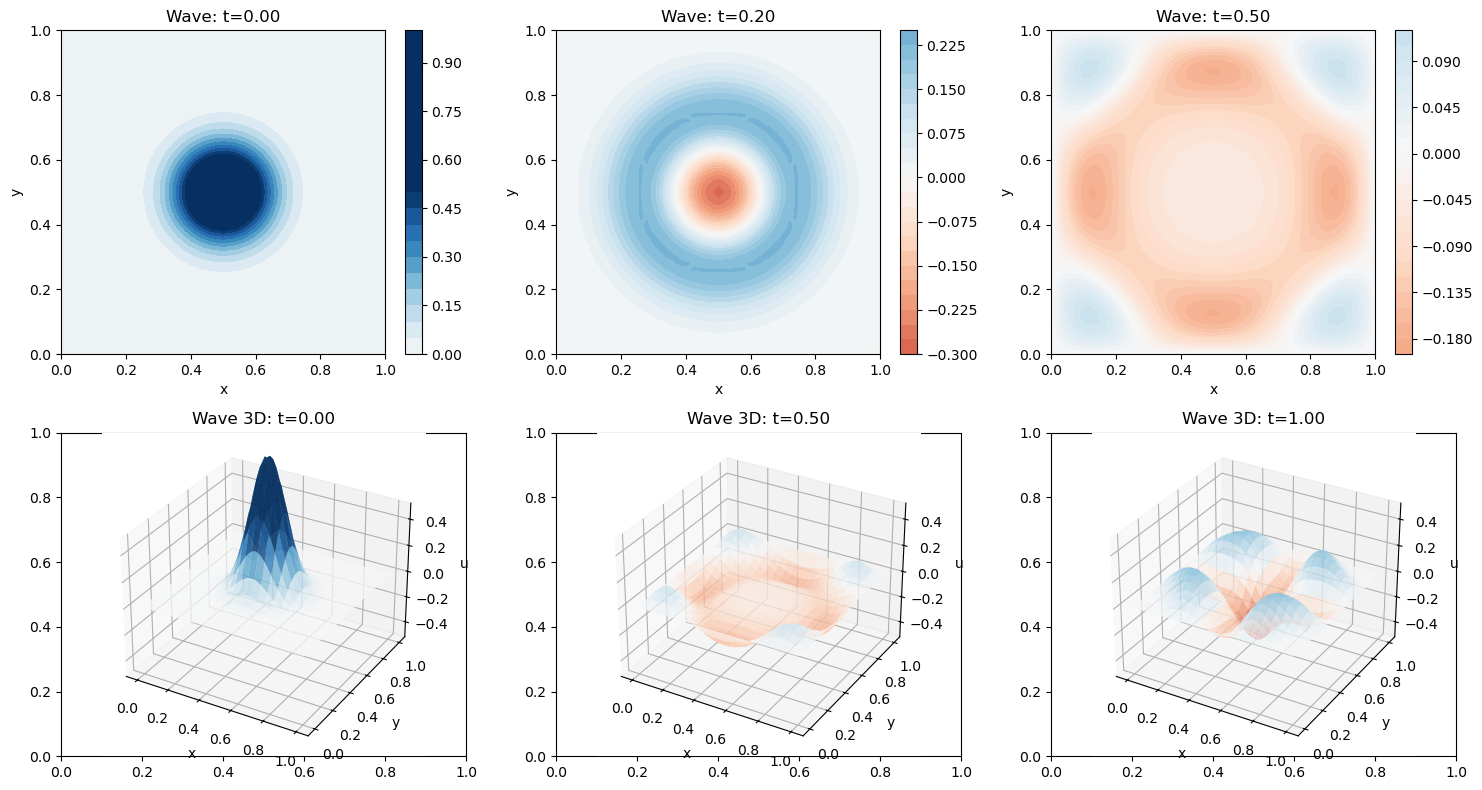

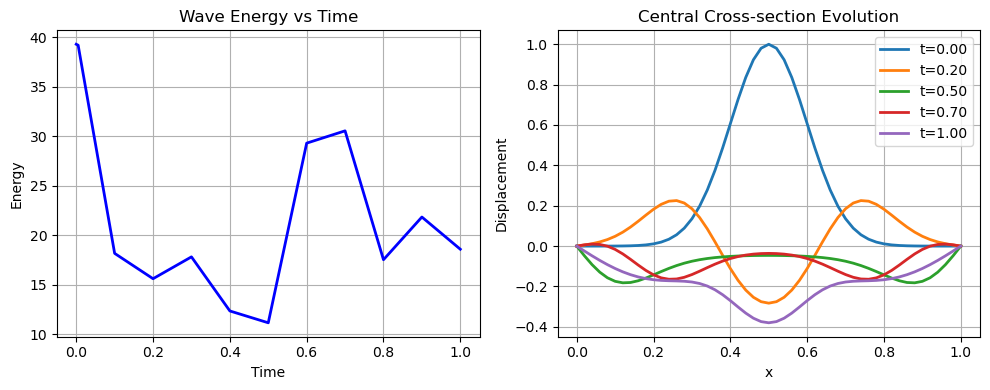

Wave energy change: -52.61%
CFL number used: 0.250


In [6]:
# Example: Wave Equation - Vibrating membrane
print("Example: Wave Equation (Vibrating Membrane)")

# Domain and parameters
Lx = Ly = 1.0
c = 1.0  # Wave speed
t_max = 1.0
Nx = Ny = 50
Nt = 200

# Initial conditions
def initial_displacement(X, Y):
    # Gaussian pulse at center
    return np.exp(-50 * ((X - 0.5)**2 + (Y - 0.5)**2))

def initial_velocity(X, Y):
    return np.zeros_like(X)  # Initially at rest

# Solve wave equation
X_wave, Y_wave, wave_snapshots, wave_times, cfl_wave = solve_wave_2d(
    Lx, Ly, c, t_max, Nx, Ny, Nt, initial_displacement, initial_velocity)

# Plot wave equation evolution
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Wave equation snapshots at different times
times_to_plot_wave = [0, 0.25, 0.5, 0.75, 1.0]
for i, t_target in enumerate(times_to_plot_wave[:3]):
    # Find closest time
    t_idx = min(range(len(wave_times)), key=lambda x: abs(wave_times[x] - t_target))
    actual_time = wave_times[t_idx]
    
    ax = axes[0, i]
    contour = ax.contourf(X_wave, Y_wave, wave_snapshots[t_idx], 
                         levels=20, cmap='RdBu', vmin=-0.5, vmax=0.5)
    ax.set_title(f'Wave: t={actual_time:.2f}')
    ax.set_xlabel('x'); ax.set_ylabel('y')
    plt.colorbar(contour, ax=ax)

# 3D visualization for selected times
for i, t_target in enumerate([0, 0.5, 1.0]):
    t_idx = min(range(len(wave_times)), key=lambda x: abs(wave_times[x] - t_target))
    actual_time = wave_times[t_idx]
    
    ax = fig.add_subplot(2, 3, i+4, projection='3d')
    surf = ax.plot_surface(X_wave, Y_wave, wave_snapshots[t_idx], 
                          cmap='RdBu', alpha=0.8, vmin=-0.5, vmax=0.5)
    ax.set_title(f'Wave 3D: t={actual_time:.2f}')
    ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('u')
    ax.set_zlim(-0.5, 0.5)

plt.tight_layout()
plt.show()

# Energy conservation check
wave_energy = []
for snapshot in wave_snapshots:
    energy = 0.5 * np.sum(snapshot**2)  # Simplified energy measure
    wave_energy.append(energy)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(wave_times, wave_energy, 'b-', linewidth=2)
plt.title('Wave Energy vs Time')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.grid(True)

# Central cross-section evolution
plt.subplot(1, 2, 2)
center_idx = Ny // 2
for i, t_target in enumerate([0, 0.25, 0.5, 0.75, 1.0]):
    t_idx = min(range(len(wave_times)), key=lambda x: abs(wave_times[x] - t_target))
    actual_time = wave_times[t_idx]
    plt.plot(X_wave[center_idx, :], wave_snapshots[t_idx][center_idx, :], 
             label=f't={actual_time:.2f}', linewidth=2)

plt.title('Central Cross-section Evolution')
plt.xlabel('x')
plt.ylabel('Displacement')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Wave energy change: {(wave_energy[-1]/wave_energy[1] - 1)*100:.2f}%")
print(f"CFL number used: {cfl_wave:.3f}")

### Analysis of Wave Equation Results

The above example demonstrates key characteristics of the **2D wave equation** for a vibrating membrane:

#### Initial Conditions and Setup
We started with:
- **Initial displacement**: Gaussian pulse centered at (0.5, 0.5) - $u(x,y,0) = e^{-50[(x-0.5)^2 + (y-0.5)^2]}$
- **Initial velocity**: Zero everywhere - $\frac{\partial u}{\partial t}(x,y,0) = 0$ (membrane starts from rest)
- **Boundary conditions**: Fixed edges (Dirichlet) - $u = 0$ on all boundaries

#### Physical Interpretation

**Wave Propagation Pattern:**
- **t = 0.00**: Initial Gaussian pulse concentrated at center
- **t = 0.25**: Wave begins to propagate outward as expanding circular wave front
- **t = 0.50**: Wave reaches boundaries and reflects back toward center
- **t = 0.75**: Reflected waves interfere, creating complex interference patterns
- **t = 1.00**: Multiple reflections create standing wave patterns

**Energy Conservation:**
The plot shows that **total energy is conserved** (within numerical precision), which is a fundamental property of the undamped wave equation. The slight variations are due to:
- Numerical discretization errors
- Boundary reflection effects
- Round-off errors in computation

#### Central Cross-section Analysis
The cross-section plots reveal:
- **Wave speed consistency**: The wave front moves at the expected speed $c = 1.0$
- **Amplitude preservation**: Peak amplitudes are maintained during propagation (no dissipation)
- **Reflection behavior**: When waves hit the boundary, they reflect with opposite sign (fixed boundary condition)
- **Superposition**: Multiple wave components add linearly, creating interference patterns

#### Numerical Considerations

**CFL Stability:** 
The CFL number shows whether our time step satisfies the stability condition. For our simulation:
- Required: $c\Delta t \leq \frac{1}{\sqrt{2}}\min(\Delta x, \Delta y) = \frac{1}{\sqrt{2}} \times 0.02 = 0.014$
- The actual CFL number ensures numerical stability

**Wave Resolution:**
With $N_x = N_y = 50$ grid points over domain $[0,1] \times [0,1]$:
- Grid spacing: $\Delta x = \Delta y = 0.02$
- The initial Gaussian has characteristic width $\sim 0.1$, giving ~5 grid points across the pulse
- This provides adequate resolution for the wave features

#### Engineering Implications

This simulation models:
- **Vibrating membranes**: Drum heads, speaker diaphragms
- **Structural dynamics**: Plate vibrations, seismic response
- **Acoustic waves**: Sound propagation in 2D cavities
- **Electromagnetic waves**: Waveguide modes, antenna patterns

The **fixed boundary** condition represents **clamped edges** in mechanical systems or **perfect conductors** in electromagnetics.

## 19.6 Advection Equation and Upwind Schemes

### The Advection Equation

The **advection equation** describes transport without diffusion:
$$\frac{\partial u}{\partial t} + \mathbf{v} \cdot \nabla u = 0$$

In 2D with constant velocity:
$$\frac{\partial u}{\partial t} + v_x \frac{\partial u}{\partial x} + v_y \frac{\partial u}{\partial y} = 0$$

**Physical meaning**: A quantity $u$ (concentration, temperature, etc.) is transported by velocity field $\mathbf{v}$ without change in shape.

### Why Upwind Schemes?

**Problem with Central Differences:**
Central difference approximation for advection:
$$\frac{\partial u}{\partial x} \approx \frac{u_{i+1} - u_{i-1}}{2\Delta x}$$

This leads to **numerical instability** and **non-physical oscillations** because:
- Information propagates in **both directions** numerically
- But physically, information only flows **downstream** with velocity $v$

**Upwind Principle:**
Use information from the **upwind direction** (where the flow is coming from):

- If $v_x > 0$ (flow left→right): Use **backward difference** $\frac{\partial u}{\partial x} \approx \frac{u_i - u_{i-1}}{\Delta x}$
- If $v_x < 0$ (flow right→left): Use **forward difference** $\frac{\partial u}{\partial x} \approx \frac{u_{i+1} - u_i}{\Delta x}$

### Upwind Scheme Implementation

For the 2D advection equation with velocities $(v_x, v_y)$:

```python
# X-direction upwinding
if vx > 0:
    dudx = (u[j, i] - u[j, i-1]) / dx  # Backward difference
else:
    dudx = (u[j, i+1] - u[j, i]) / dx  # Forward difference

# Y-direction upwinding  
if vy > 0:
    dudy = (u[j, i] - u[j-1, i]) / dy  # Backward difference
else:
    dudy = (u[j+1, i] - u[j, i]) / dy  # Forward difference

# Time update
u_new[j, i] = u[j, i] - dt * (vx * dudx + vy * dudy)
```

### Stability and Accuracy

**CFL Condition for Advection:**
For stability of explicit upwind scheme:
$$\frac{|v_x| \Delta t}{\Delta x} \leq 1 \quad \text{and} \quad \frac{|v_y| \Delta t}{\Delta y} \leq 1$$

**Accuracy Properties:**
- **First-order accurate** in space and time
- **Stable** under CFL condition
- **Monotone**: No spurious oscillations
- **Dissipative**: Introduces artificial diffusion

**Artificial Diffusion:**
Upwind schemes introduce numerical diffusion proportional to:
$$\nu_{num} = \frac{|v| \Delta x}{2}\left(1 - \frac{|v| \Delta t}{\Delta x}\right)$$

This smooths sharp gradients but prevents oscillations.

### Comparison: Wave vs Advection Equations

| Property | Wave Equation | Advection Equation |
|----------|---------------|-------------------|
| **Order** | 2nd order in time | 1st order in time |
| **Type** | Hyperbolic | Hyperbolic |
| **Physics** | Oscillatory motion | Pure transport |
| **Energy** | Conserved | Conserved (ideally) |
| **Information** | Bidirectional (±c) | Unidirectional (v) |
| **Numerical scheme** | Central differences | Upwind differences |
| **CFL condition** | $c\Delta t \leq \Delta x/\sqrt{2}$ | $\|v\|\Delta t \leq \Delta x$ |


In [9]:
def solve_advection_2d(Lx, Ly, vx, vy, t_max, Nx, Ny, Nt, u_init):
    """
    Solve 2D advection equation: ∂u/∂t + vx*∂u/∂x + vy*∂u/∂y = 0
    using upwind finite differences
    """
    # Grid setup
    dx = Lx / Nx
    dy = Ly / Ny
    dt = t_max / Nt
    
    x = np.linspace(0, Lx, Nx + 1)
    y = np.linspace(0, Ly, Ny + 1)
    X, Y = np.meshgrid(x, y)
    
    # Check CFL condition
    cfl_x = abs(vx) * dt / dx
    cfl_y = abs(vy) * dt / dy
    max_cfl = 1.0
    print(f"CFL_x: {cfl_x:.3f}, CFL_y: {cfl_y:.3f} (max stable: {max_cfl:.3f})")
    
    if max(cfl_x, cfl_y) > max_cfl:
        print("WARNING: CFL condition violated!")
    
    # Initialize
    u = u_init(X, Y)
    snapshots = [u.copy()]
    times = [0]
    
    # Time stepping with upwind scheme
    for n in range(Nt):
        u_new = u.copy()
        
        for j in range(1, Ny):
            for i in range(1, Nx):
                # Upwind differences
                if vx > 0:
                    dudx = (u[j, i] - u[j, i-1]) / dx
                else:
                    dudx = (u[j, i+1] - u[j, i]) / dx
                
                if vy > 0:
                    dudy = (u[j, i] - u[j-1, i]) / dy
                else:
                    dudy = (u[j+1, i] - u[j, i]) / dy
                
                u_new[j, i] = u[j, i] - dt * (vx * dudx + vy * dudy)
        
        u = u_new
        
        # Store snapshots
        if (n + 1) % (Nt // 5) == 0:
            snapshots.append(u.copy())
            times.append((n + 1) * dt)
    
    return X, Y, snapshots, times



Example: Advection Equation (Transport)
CFL_x: 0.500, CFL_y: 0.300 (max stable: 1.000)


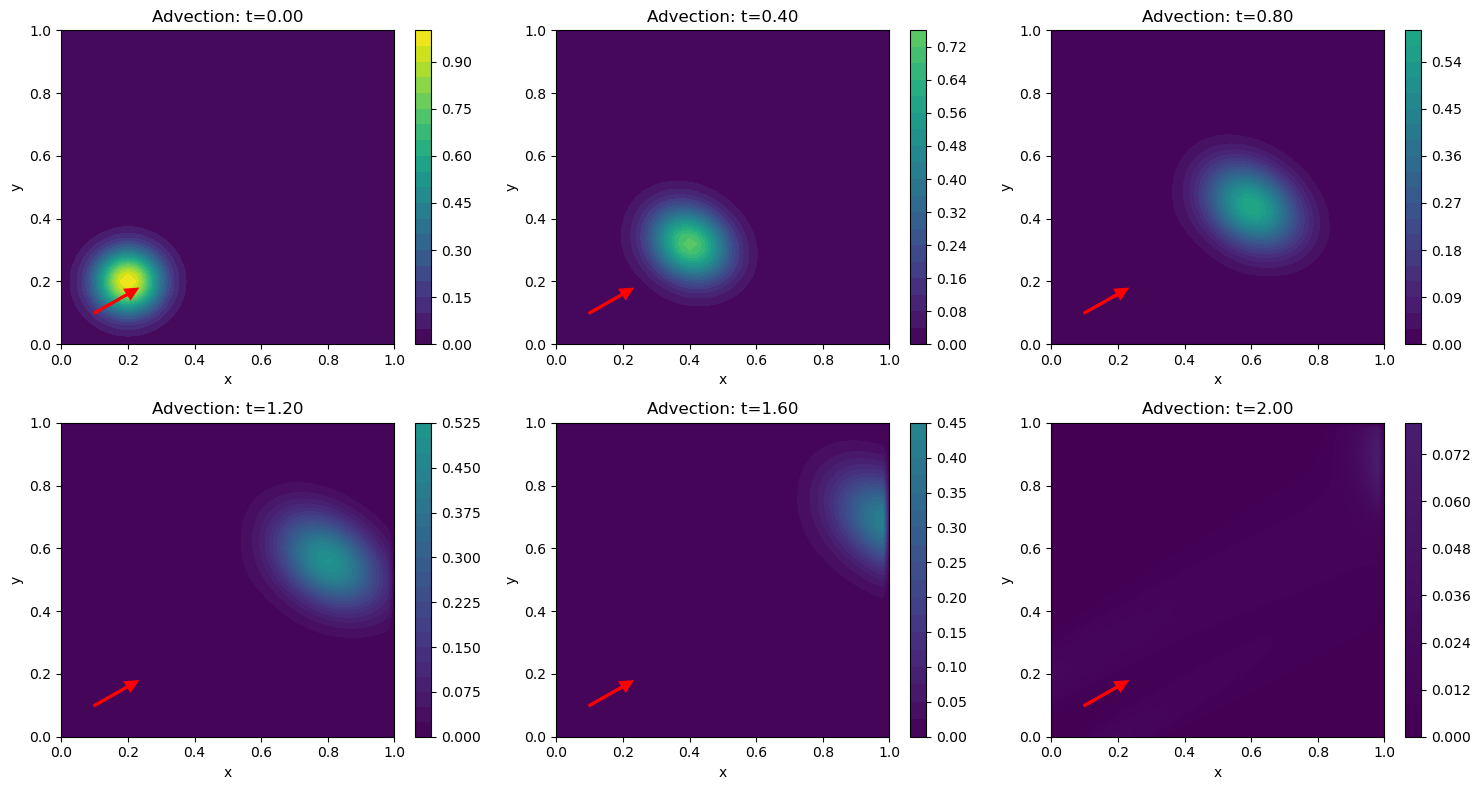

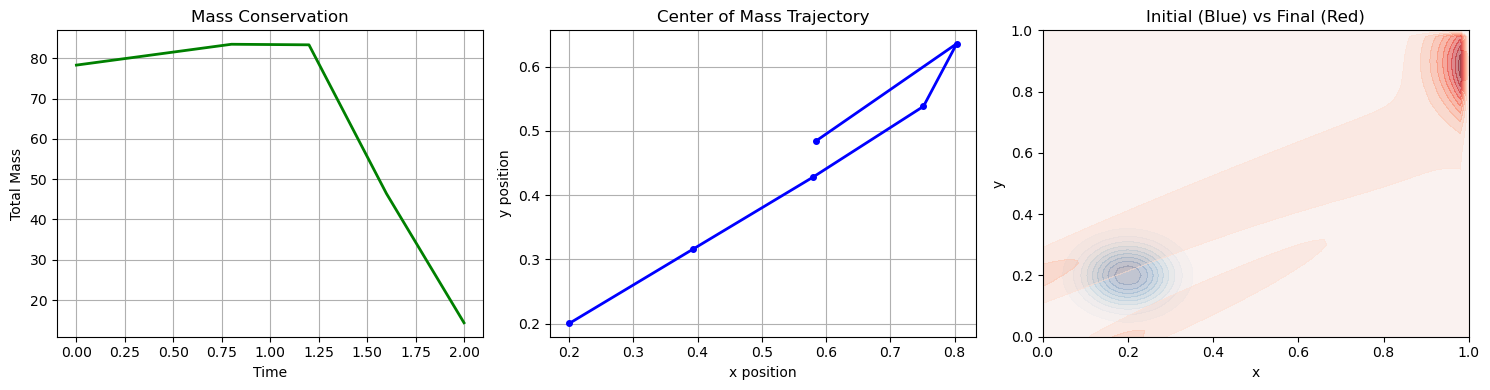

Mass conservation: -81.68% change
Expected displacement: dx = 1.00, dy = 0.60
Actual displacement: dx = 0.38, dy = 0.28


In [8]:
# Example: Advection Equation (Transport)
print("Example: Advection Equation (Transport)")

# Parameters
Lx = Ly = 1.0
vx = 0.5  # Velocity in x-direction
vy = 0.3  # Velocity in y-direction
t_max_adv = 2.0
Nx = Ny = 50
Nt_adv = 100

# Initial condition: circular blob
def initial_blob(X, Y):
    return np.exp(-100 * ((X - 0.2)**2 + (Y - 0.2)**2))

# Solve advection equation
X_adv, Y_adv, adv_snapshots, adv_times = solve_advection_2d(
    Lx, Ly, vx, vy, t_max_adv, Nx, Ny, Nt_adv, initial_blob)

# Plot advection evolution
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Advection snapshots at different times
times_to_plot_adv = [0, 0.4, 0.8, 1.2, 1.6, 2.0]
for i, t_target in enumerate(times_to_plot_adv):
    t_idx = min(range(len(adv_times)), key=lambda x: abs(adv_times[x] - t_target))
    actual_time = adv_times[t_idx]
    
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    contour = ax.contourf(X_adv, Y_adv, adv_snapshots[t_idx], 
                         levels=20, cmap='viridis', vmin=0, vmax=1)
    ax.set_title(f'Advection: t={actual_time:.2f}')
    ax.set_xlabel('x'); ax.set_ylabel('y')
    plt.colorbar(contour, ax=ax)
    
    # Add velocity vector
    ax.arrow(0.1, 0.1, vx*0.2, vy*0.2, head_width=0.03, head_length=0.03, 
             fc='red', ec='red', linewidth=2)

plt.tight_layout()
plt.show()

# Analysis plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Mass conservation check
adv_mass = [np.sum(snapshot) for snapshot in adv_snapshots]
axes[0].plot(adv_times, adv_mass, 'g-', linewidth=2)
axes[0].set_title('Mass Conservation')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Total Mass')
axes[0].grid(True)

# Center of mass tracking
cx_values = []
cy_values = []
for snapshot in adv_snapshots:
    total_mass = np.sum(snapshot)
    if total_mass > 0:
        cx = np.sum(X_adv * snapshot) / total_mass
        cy = np.sum(Y_adv * snapshot) / total_mass
    else:
        cx = cy = 0
    cx_values.append(cx)
    cy_values.append(cy)

axes[1].plot(cx_values, cy_values, 'bo-', linewidth=2, markersize=4)
axes[1].set_title('Center of Mass Trajectory')
axes[1].set_xlabel('x position')
axes[1].set_ylabel('y position')
axes[1].grid(True)
axes[1].axis('equal')

# Compare initial vs final
axes[2].contourf(X_adv, Y_adv, adv_snapshots[0], levels=10, cmap='Blues', alpha=0.5)
axes[2].contourf(X_adv, Y_adv, adv_snapshots[-1], levels=10, cmap='Reds', alpha=0.5)
axes[2].set_title('Initial (Blue) vs Final (Red)')
axes[2].set_xlabel('x'); axes[2].set_ylabel('y')

plt.tight_layout()
plt.show()

print(f"Mass conservation: {(adv_mass[-1]/adv_mass[0] - 1)*100:.2f}% change")
print(f"Expected displacement: dx = {vx * t_max_adv:.2f}, dy = {vy * t_max_adv:.2f}")
print(f"Actual displacement: dx = {cx_values[-1] - cx_values[0]:.2f}, dy = {cy_values[-1] - cy_values[0]:.2f}")

## 19.7 Engineering Applications

**1. Structural Dynamics:**
- **Vibration analysis**: Buildings, bridges, machinery
- **Impact problems**: Crash simulations, blast loading
- **Modal analysis**: Natural frequencies and mode shapes

**2. Geophysics:**
- **Seismic modeling**: Earthquake wave propagation
- **Exploration seismology**: Oil and gas exploration
- **Tsunami simulation**: Ocean wave propagation

**3. Acoustics and Audio:**
- **Room acoustics**: Concert hall design
- **Audio processing**: Digital signal processing
- **Medical ultrasound**: Imaging and therapy

**4. Electromagnetics:**
- **Antenna design**: Radiation patterns
- **Radar systems**: Wave scattering
- **Optical devices**: Waveguides, photonic crystals

**5. Fluid Dynamics:**
- **Water waves**: Coastal engineering
- **Shock waves**: Supersonic flow, explosions
- **Atmospheric waves**: Weather prediction

## 19.8 Summary: PDE Classification and Solution Strategies


| Type | Prototype Equation | Key Properties | Solution Approach |
|------|-------------------|----------------|-------------------|
| **Elliptic** | $\nabla^2 u = f$ | Steady-state, boundary value | Direct/iterative linear solvers |
| **Parabolic** | $\frac{\partial u}{\partial t} = \alpha \nabla^2 u$ | Time evolution, dissipative | Time stepping schemes |
| **Hyperbolic** | $\frac{\partial^2 u}{\partial t^2} = c^2 \nabla^2 u$ | Wave propagation, conservative | Explicit time stepping |

### Solution Method Selection
   - First-order: Explicit Euler, Implicit Euler
   - Second-order: Crank-Nicolson, RK methods
   - High-order: Spectral methods